In [1]:
# MA Cross Backtesting on 1H BTC with following trade costs and timeframes
# - Slippage is 0.5BPS
# - Taker fee is 0.05%
# - Initial capital is 10000.0$
# - Position size per trade is 2% of account
# - Timeframe is 1H
# 

In [2]:
import warnings
warnings.filterwarnings("ignore")
def action_with_warnings():
    warnings.warn("should not appear")
with warnings.catch_warnings(record=True):
    action_with_warnings()
import yfinance          as yf
import pandas            as pd
import numpy             as np
import quantstats        as qs
import matplotlib.pyplot as plt

In [3]:
df = yf.download('BTC-USD', interval='1h', period='23mo')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-04-26 10:00:00+00:00,40397.046875,40424.828125,40365.218750,40387.425781,40387.425781,0
2022-04-26 11:00:00+00:00,40384.980469,40521.320312,40330.285156,40478.988281,40478.988281,0
2022-04-26 12:00:00+00:00,40474.105469,40584.839844,40307.937500,40325.574219,40325.574219,0
2022-04-26 13:00:00+00:00,40318.683594,40330.464844,39925.980469,39925.980469,39925.980469,69404672
2022-04-26 14:00:00+00:00,39912.597656,39912.597656,39357.871094,39359.488281,39359.488281,228679680
...,...,...,...,...,...,...
2024-03-26 06:00:00+00:00,70334.234375,70607.781250,70307.828125,70607.781250,70607.781250,0
2024-03-26 07:00:00+00:00,70632.703125,71511.523438,70477.585938,70544.632812,70544.632812,1655394304
2024-03-26 08:00:00+00:00,70505.265625,70760.796875,70382.835938,70648.453125,70648.453125,658464768


<Axes: xlabel='Datetime'>

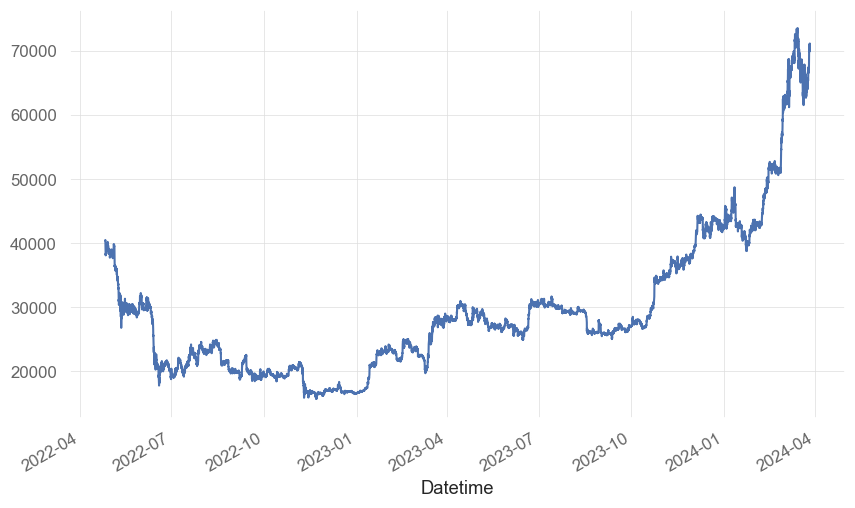

In [4]:
df['Close'].plot()

In [5]:
df['Price'] = df['Open'].shift(-1)

df

,Open,High,Low,Close,Adj Close,Volume,Price
Datetime,,,,,,,
2022-04-26 10:00:00+00:00,40397.046875,40424.828125,40365.218750,40387.425781,40387.425781,0,40384.980469
2022-04-26 11:00:00+00:00,40384.980469,40521.320312,40330.285156,40478.988281,40478.988281,0,40474.105469
2022-04-26 12:00:00+00:00,40474.105469,40584.839844,40307.937500,40325.574219,40325.574219,0,40318.683594
2022-04-26 13:00:00+00:00,40318.683594,40330.464844,39925.980469,39925.980469,39925.980469,69404672,39912.597656
2022-04-26 14:00:00+00:00,39912.597656,39912.597656,39357.871094,39359.488281,39359.488281,228679680,39338.433594
...,...,...,...,...,...,...,...
2024-03-26 06:00:00+00:00,70334.234375,70607.781250,70307.828125,70607.781250,70607.781250,0,70632.703125
2024-03-26 07:00:00+00:00,70632.703125,71511.523438,70477.585938,70544.632812,70544.632812,1655394304,70505.265625
2024-03-26 08:00:00+00:00,70505.265625,70760.796875,70382.835938,70648.453125,70648.453125,658464768,70690.148438


In [6]:
df.dropna(inplace=True)

In [7]:
# Signal extraction

df['MA50' ] = df['Close'].rolling(window=20).mean()
df['MA200'] = df['Close'].rolling(window=50).mean()

df['Signal'] = 0
df.loc[((df['MA50'] > df['MA200']) & (df['MA50'].shift(1) <= df['MA200'].shift(1))), 'Signal'] =  1
df.loc[((df['MA50'] < df['MA200']) & (df['MA50'].shift(1) >= df['MA200'].shift(1))), 'Signal'] = -1

In [8]:
df['Signal'].value_counts()

Signal
 0    16362
-1      208
 1      208
Name: count, dtype: int64

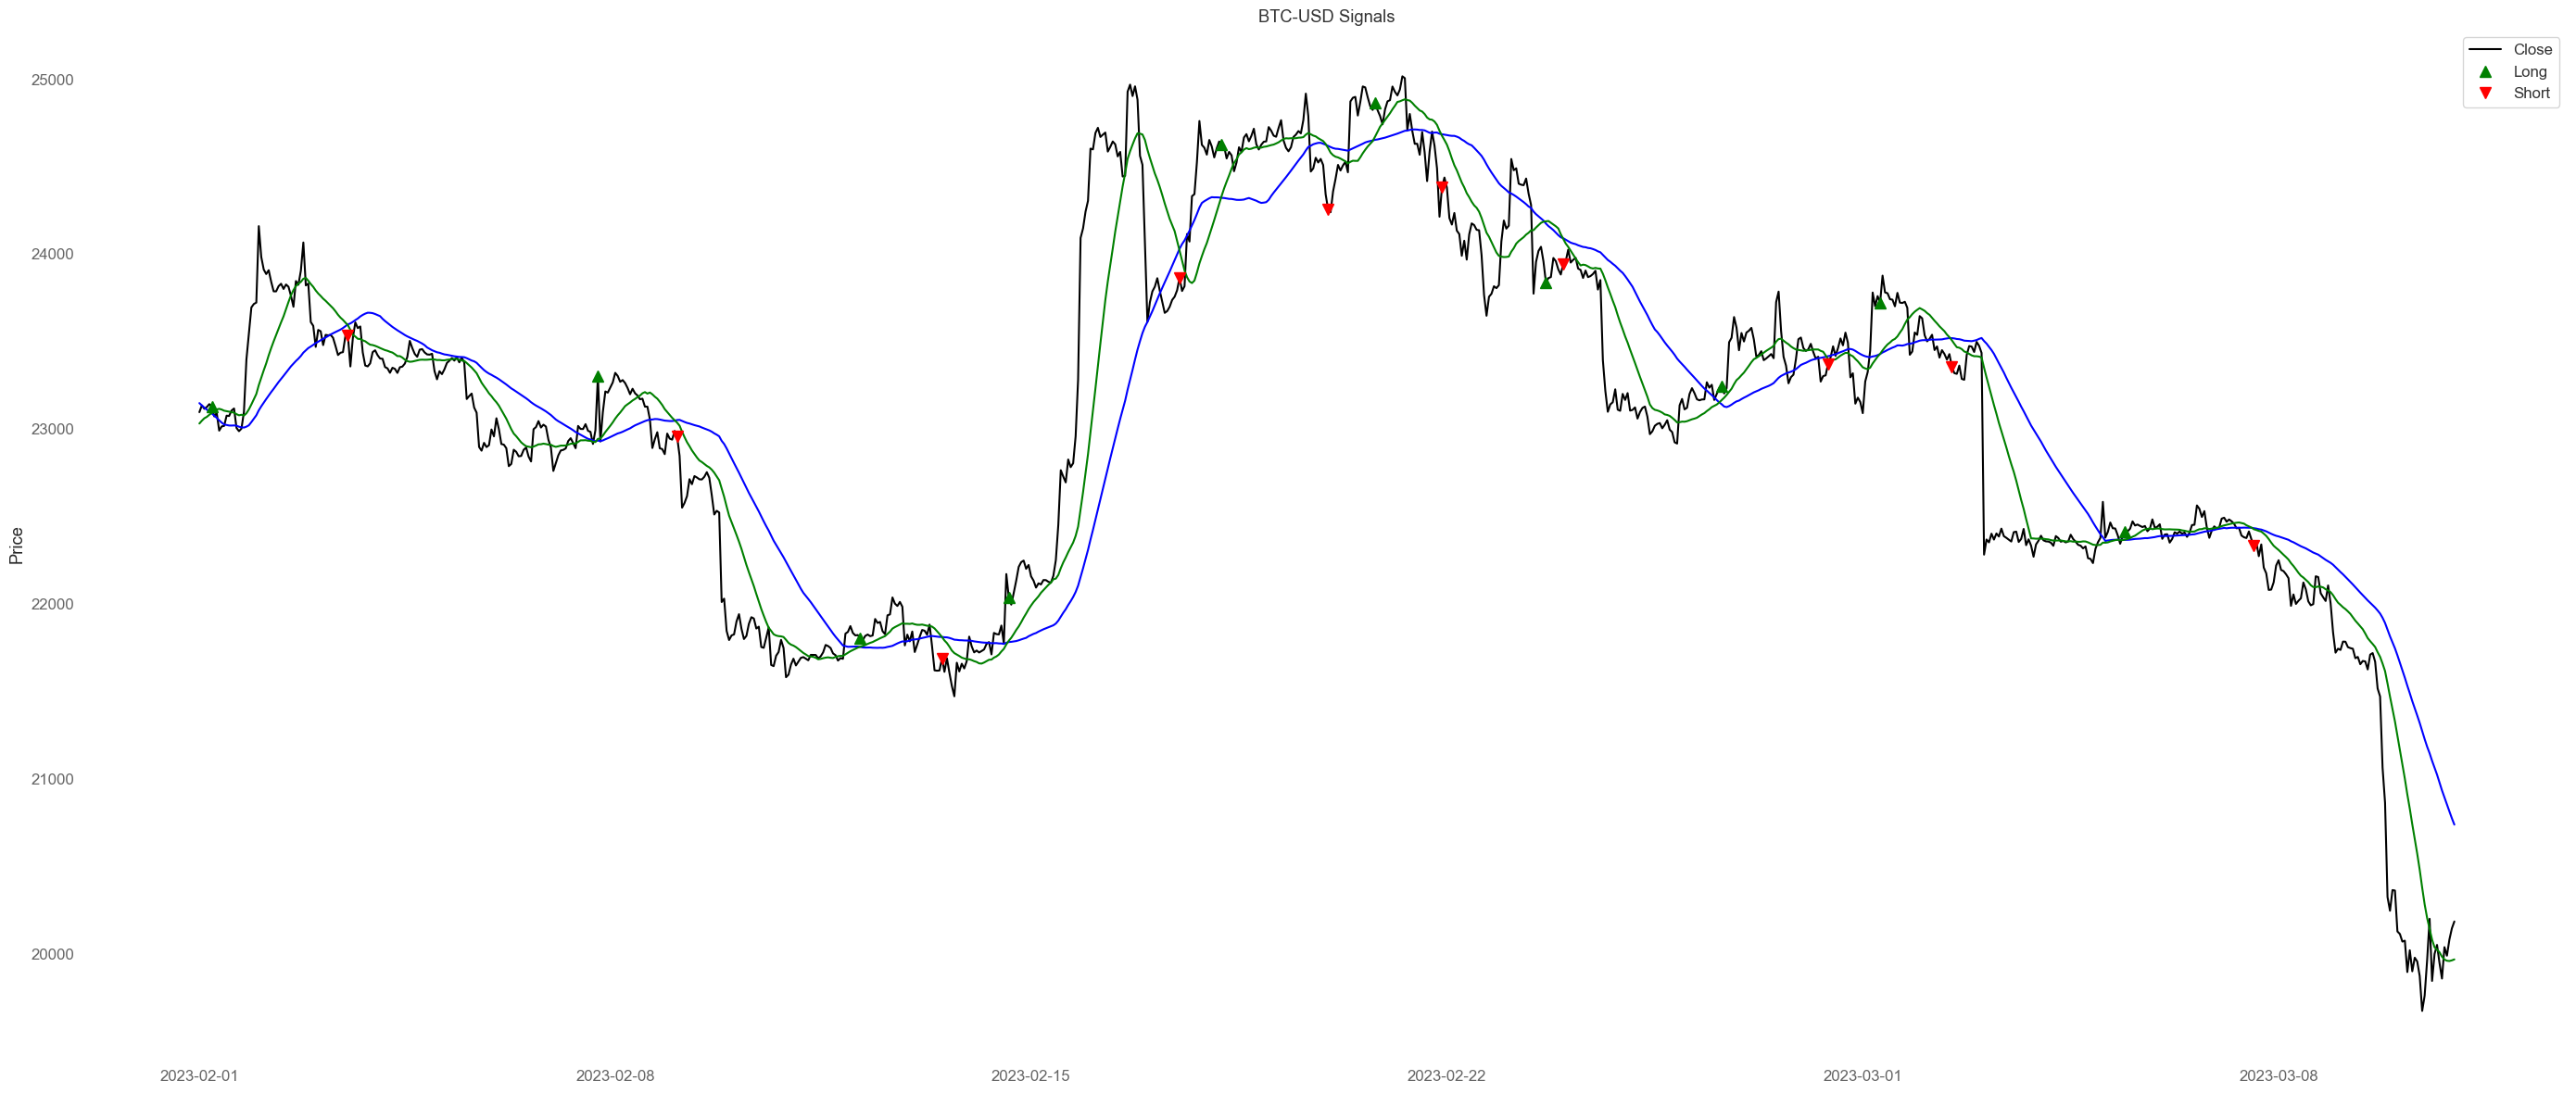

In [9]:
plot_df = df["2023-02-01":"2023-03-10"]

fig, ax1 = plt.subplots(1, figsize=(28, 12), sharex=True)

ax1.plot(plot_df.index, plot_df['Close'], label='Close', color='black')
ax1.plot(plot_df['MA200'], color='blue' )
ax1.plot(plot_df['MA50' ], color='green')
ax1.plot(plot_df[plot_df['Signal'] ==  1].index, plot_df[plot_df['Signal'] ==  1]['Close'], '^', markersize=8, color='green', label='Long' )
ax1.plot(plot_df[plot_df['Signal'] == -1].index, plot_df[plot_df['Signal'] == -1]['Close'], 'v', markersize=8, color='red'  , label='Short')
ax1.set_ylabel('Price')
ax1.set_title('BTC-USD Signals')
ax1.legend()
ax1.grid()

plt.tight_layout()
plt.show()

In [16]:
# Position tracking
position         = 0
entry_timestamp  = None
entry_price      = 0
exit_timestamp   = None
exit_price       = 0
position_history = []

for index, row in df.iterrows():
    if row['Signal'] != position:
        # Exit position
        if position != 0:
            exit_timestamp = index
            exit_price     = row['Price'] 
            pct_change     = (exit_price - entry_price) / entry_price
            position_history.append((entry_timestamp, exit_timestamp, entry_price, exit_price, pct_change))
        # Enter new position
        if row['Signal'] == 1:
            entry_timestamp = index
            entry_price     = row['Price']
        elif row['Signal'] == -1:
            entry_timestamp = index
            entry_price     = row['Price']
        position = row['Signal']

position_df = pd.DataFrame(position_history, columns=['EntryTime', 'ExitTime', 'EntryPrice', 'ExitPrice', 'Return'])
position_df = position_df.set_index(pd.DatetimeIndex(position_df['EntryTime']))

position_df

,EntryTime,ExitTime,EntryPrice,ExitPrice,Return
EntryTime,,,,,
2022-04-29 16:00:00+00:00,2022-04-29 16:00:00+00:00,2022-04-29 17:00:00+00:00,38536.363281,38646.074219,0.002847
2022-05-02 05:00:00+00:00,2022-05-02 05:00:00+00:00,2022-05-02 06:00:00+00:00,38991.261719,38944.355469,-0.001203
2022-05-03 12:00:00+00:00,2022-05-03 12:00:00+00:00,2022-05-03 13:00:00+00:00,38467.992188,38366.031250,-0.002651
2022-05-04 16:00:00+00:00,2022-05-04 16:00:00+00:00,2022-05-04 17:00:00+00:00,39153.312500,39018.121094,-0.003453
2022-05-05 20:00:00+00:00,2022-05-05 20:00:00+00:00,2022-05-05 21:00:00+00:00,36435.324219,36484.324219,0.001345
...,...,...,...,...,...
2024-03-18 03:00:00+00:00,2024-03-18 03:00:00+00:00,2024-03-18 04:00:00+00:00,67827.648438,68341.851562,0.007581
2024-03-19 03:00:00+00:00,2024-03-19 03:00:00+00:00,2024-03-19 04:00:00+00:00,65885.210938,65351.316406,-0.008103
2024-03-21 00:00:00+00:00,2024-03-21 00:00:00+00:00,2024-03-21 01:00:00+00:00,67682.367188,67803.671875,0.001792


<Axes: xlabel='EntryTime'>

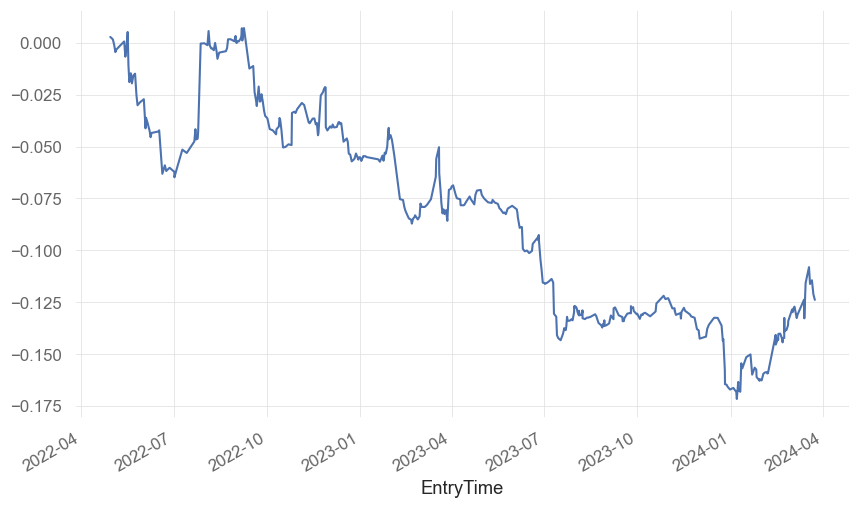

In [17]:
# Naive cumulative sum
position_df['Return'].cumsum().plot()

In [19]:
# Cost adjustments

position_df['LogReturn'] = (1+position_df['Return']).apply(np.log)

slippage_pct  = 0.005 # 0.5BPS 
taker_fee_pct = 0.05  # Binance taker fee is 0.05%
transaction_cost_log = np.log(1-slippage_pct/100.0) + np.log(1-taker_fee_pct/100.0)
position_df['AdjustedLogReturn'] = position_df['LogReturn']  + transaction_cost_log

position_df['CumRet'            ] = position_df['Return'].cumsum()
position_df['CostAdjustedCumRet'] = position_df['AdjustedLogReturn'].cumsum().apply(np.exp)

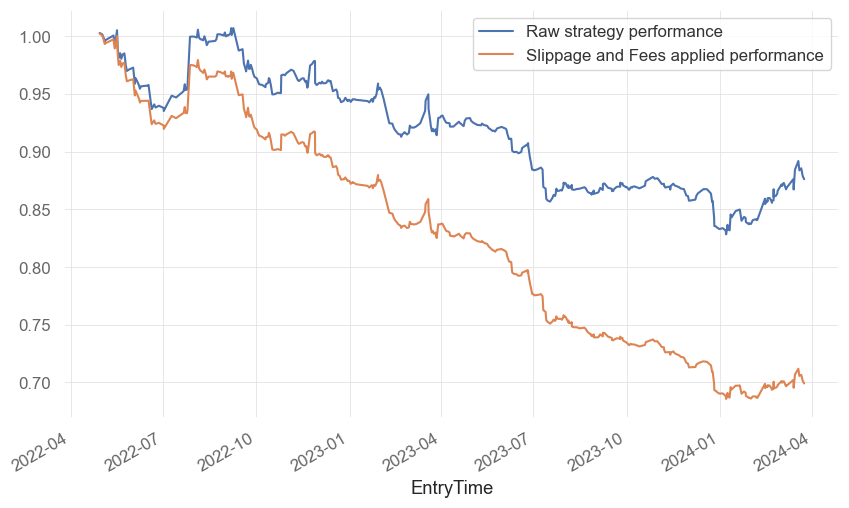

In [25]:
position_df[['CumRet', 'CostAdjustedCumRet']].plot()
plt.legend(['Raw strategy performance', 'Slippage and Fees applied performance'])

In [26]:
position_df['Account Change'] = position_df['CostAdjustedCumRet'].pct_change()

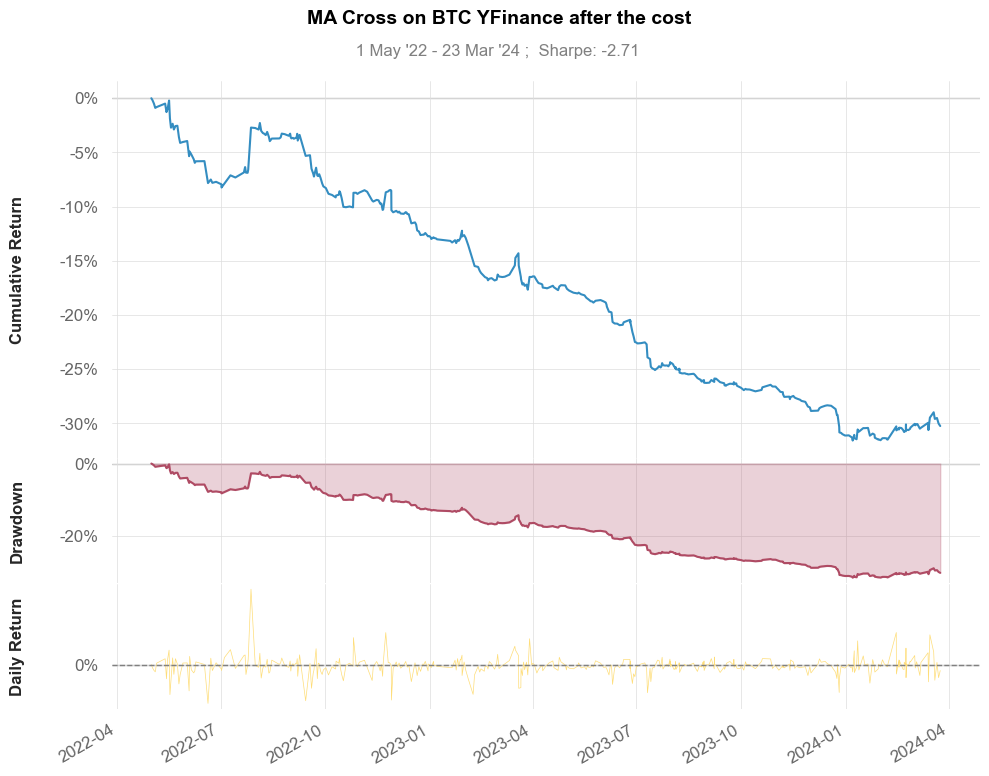

In [28]:
qs.plots.snapshot(position_df['Account Change'], title='MA Cross on BTC YFinance after the cost', show=True);

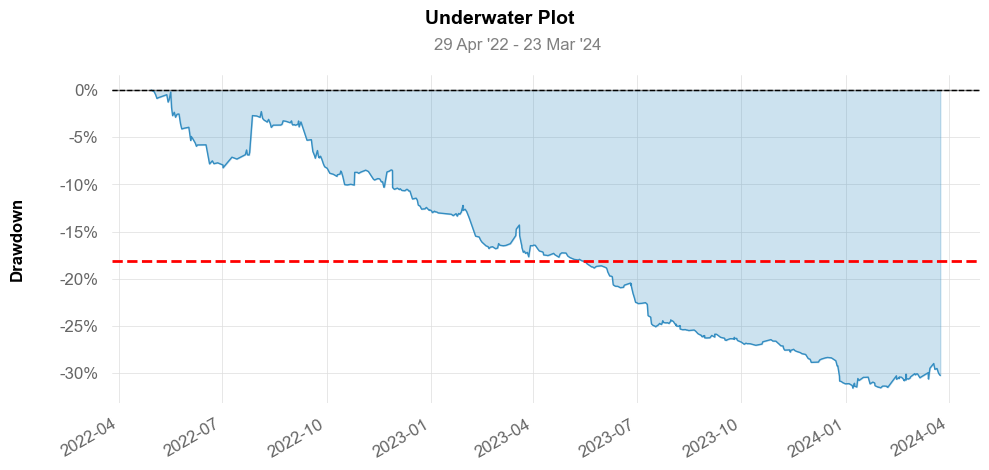

In [29]:
qs.plots.drawdown(position_df['Account Change'])

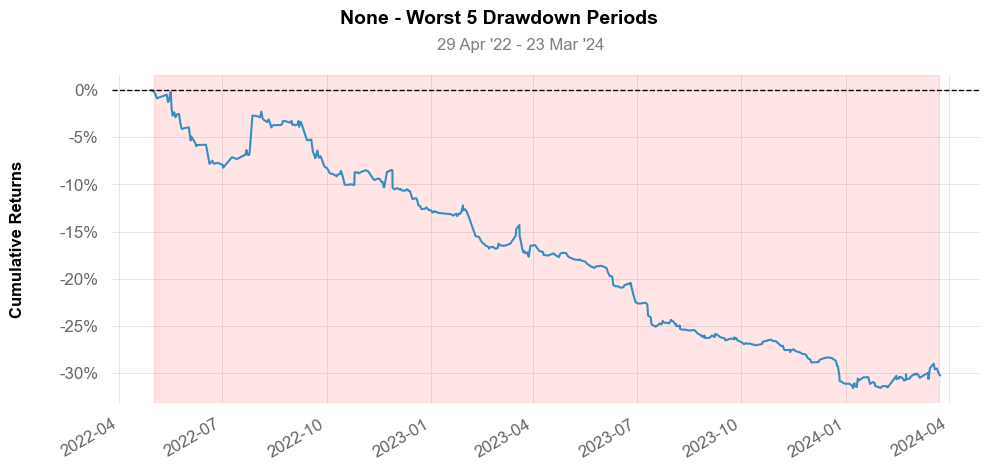

In [30]:
qs.plots.drawdowns_periods(position_df['Account Change'])

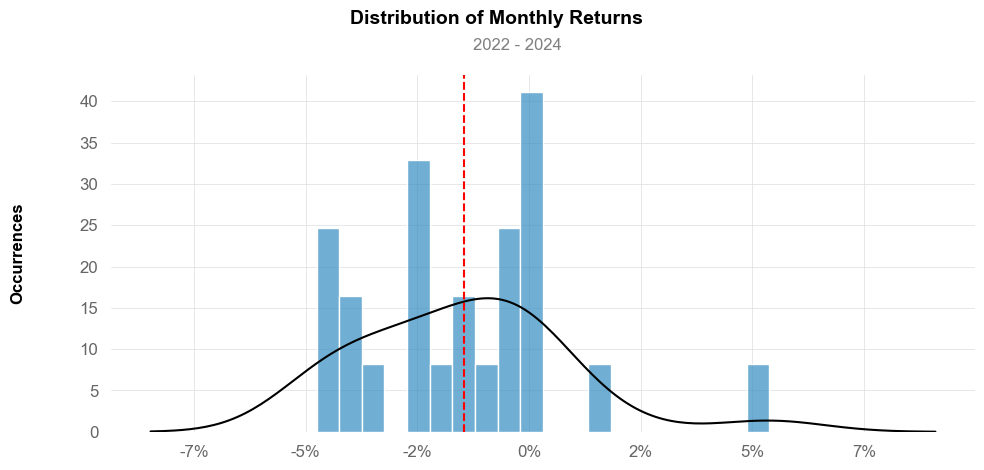

In [31]:
qs.plots.histogram(position_df['Account Change'])

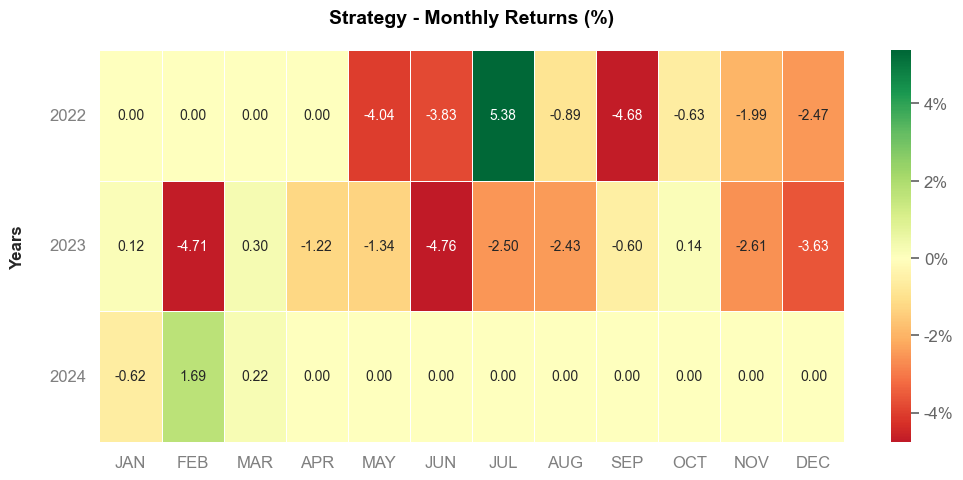

In [32]:
qs.plots.monthly_heatmap(position_df['Account Change'])

In [33]:
qs.stats.sharpe(position_df['Account Change'])

-2.711400866366906